# Ejemplo

Construir el polinomio de grado 1 para la funcion $f(x)=tan^{-1}x$,  entorno a $x_0=0$

El polinomio grado 1 es: $$P(x)=f(x_0)+f'(x_0)(x-x_0)$$


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

f = lambda x: np.arctan(x)
P = lambda x: x

values = [1,3.5,5]

def evaluacion(values, f, P):
    lista = []  
    for i in values:
        lista.append([i, f(i), P(i), abs(f(i) - P(i))])
    lista = pd.DataFrame(data=lista, columns=['values_x', 'f(x)', 'P(x)', '|f(x)-P(x)|'])
    return lista

evaluacion(values, f, P)

,values_x,f(x),P(x),|f(x)-P(x)|
0,1.0,0.785398,1.0,0.214602
1,3.5,1.292497,3.5,2.207503
2,5.0,1.373401,5.0,3.626599


Text(0, 0.5, 'Eje Y')

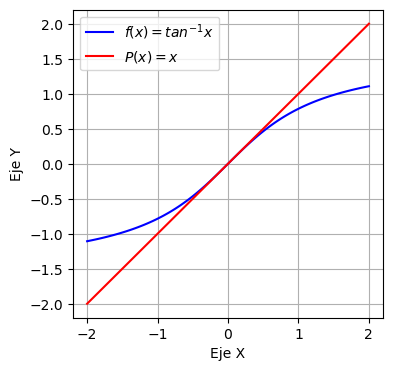

In [8]:
delta = 2   # Distancia hacia la izquierda y derecha desde el punto central
x0 = 0      # Punto central (porque es serie de Taylor en 0)
ux = np.linspace(x0 - delta, x0 + delta, 100) # Creamos 100 puntos entre -2 y 2
plt.figure(figsize=(4,4)) # Creamos la figura con tamaño 4x4
plt.plot(ux, f(ux), 'b', label='$f(x)=tan^{-1}x$') # Graficamos la función real en azul
plt.plot(ux, P(ux), 'r', label='$P(x)=x$') # Graficamos el polinomio aproximado en rojo
plt.legend() # Mostramos la leyenda
plt.grid() # Mostramos cuadrícula
plt.xlabel('Eje X') # Etiquetas de los ejes
plt.ylabel('Eje Y')

# Ejemplo:
Construir el polinomio de grado 5 para la función $f(x)=tan^{-1}x$, entorno a $x_0=0$

El polinomio de grado 1 es : $$P(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\frac{f'''(x_0)}{3!}(x-x_0)^3+\frac{f^{(4)}(x_0)}{4!}(x-x_0)^4+\frac{f^{(5)}(x_0)}{5!}(x-x_0)^5$$

In [9]:
import sympy as sp  # Importamos la librería SymPy para trabajar con matemáticas simbólicas

x = sp.symbols('x') # Creamos la variable simbólica x
F = sp.atan(x) # Definimos la función simbólica F(x) = arctan(x)

# Calculamos la segunda derivada de F respecto a x
# El tercer argumento (2) significa que derivamos 2 veces
y_prime = sp.diff(F, x, 2)
df_eval = sp.lambdify(x, y_prime) # Convertimos la expresión simbólica en una función numérica de Python
print(df_eval(0)) # Evaluamos la segunda derivada en x = 0

0.0


Evaluaciones:
\[
\begin{aligned}
f(0) &= 0\\
f'(0) &= 1\\
f''(0) &= 0\\
f^{(3)}(0) &= -2\\
f^{(4)}(0) &= 0\\
f^{(5)}(0) &= 24
\end{aligned}
\]


$$P(x)=(x-x_0)+\frac{-2}{3!}(x-x_0)^3+\frac{24}{5!}(x-x_0)^5$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
#import serie_taylor as st

f = lambda x: np.arctan(x)
P = lambda x: x - 2/factorial(3)*x**3 + 24/factorial(5)*x**5

values = [1, 3.5, 5]
print(evaluacion(values, f, P))

   values_x      f(x)        P(x)  |f(x)-P(x)|
0       1.0  0.785398    0.866667     0.081269
1       3.5  1.292497   94.252083    92.959587
2       5.0  1.373401  588.333333   586.959933


Text(0, 0.5, 'Eje Y')

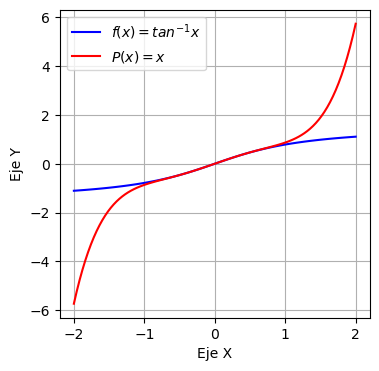

In [11]:
delta = 2   # Distancia hacia la izquierda y derecha desde el punto central
x0 = 0      # Punto central (porque es serie de Taylor en 0)
ux = np.linspace(x0 - delta, x0 + delta, 100) # Creamos 100 puntos entre -2 y 2
plt.figure(figsize=(4,4)) # Creamos la figura con tamaño 4x4
plt.plot(ux, f(ux), 'b', label='$f(x)=tan^{-1}x$') # Graficamos la función real en azul
plt.plot(ux, P(ux), 'r', label='$P(x)=x$') # Graficamos el polinomio aproximado en rojo
plt.legend() # Mostramos la leyenda
plt.grid() # Mostramos cuadrícula
plt.xlabel('Eje X') # Etiquetas de los ejes
plt.ylabel('Eje Y')

# Serie de Taylor

Sea una función $f(x)$ con derivadas de todos los órdenes en un punto $a$.

La **serie de Taylor** centrada en $a$ es:

$$
f(x)=\sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^n
$$

Equivalente a:

$$
f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f^{(3)}(a)}{3!}(x-a)^3+\dots
$$


In [25]:
# Programación de la Serie de Taylor de orden n

import sympy as sp              # Librería para matemáticas simbólicas
from math import factorial      # Función para calcular el factorial k!

x = sp.symbols('x') # Definimos la variable simbólica x

def Taylor_serie(f, x0, n):
    """
    Calcula el polinomio de Taylor de orden n
    de una función simbólica f centrado en x0.
    
    Parámetros:
    f  -> función simbólica (ej: sp.sin(x))
    x0 -> punto donde se centra la serie
    n  -> orden del polinomio
    
    Retorna:
    Polinomio de Taylor expandido
    """
    polinomio = 0  # Inicializamos el polinomio en 0
    for k in range(n + 1): # Recorremos desde k = 0 hasta k = n
        df = sp.diff(f, x, k) # Calculamos la derivada k-ésima de la función
        df_eval = sp.lambdify(x, df) # Convertimos la derivada simbólica en función evaluable
        valor_derivada = df_eval(x0) # Evaluamos la derivada en el punto x0
        # Construimos el término:
        # (f^(k)(x0) / k!) * (x - x0)^k
        termino = (valor_derivada / factorial(k)) * (x - x0)**k
        polinomio += termino # Sumamos el término al polinomio
    return sp.expand(polinomio) # Expandimos el polinomio para simplificarlo


In [26]:
F = sp.atan(x)
Taylor_serie(F, 0, 5)

0.2*x**5 - 0.333333333333333*x**3 + 1.0*x

# Ejercicio – Serie de Taylor

Determinar para la función:

$$
f(x) = x e^{x^2}
$$

alrededor de $x_0 = 1$:

1. Hallar el polinomio de grado 1 y nombrarlo como $P_1$.

2. Hallar el polinomio de grado 3 y nombrarlo como $P_3$.

3. Hallar el polinomio de grado 4 y nombrarlo como $P_4$.

4. Para cada polinomio construido, hallar la aproximación en:
   
   $$
   P_k(2)
   $$

5. Hallar el valor verdadero, es decir:

   $$
   f(2)
   $$

6. Calcular el error absoluto y el error relativo.

7. Hacer una gráfica de la función vs cada uno de los polinomios construidos.


P1(x) = 8.15484548537714*x - 5.43656365691809
P3(x) = 17.215784913574*x**3 - 38.0559455984266*x**2 + 32.6193819415085*x - 9.06093942819682
P4(x) = 17.6688318849838*x**4 - 53.4595426263612*x**3 + 67.9570457114761*x**2 - 38.0559455984266*x + 8.60789245678697

Aproximaciones en x = 2
P1(2) = 10.8731273138362
P3(2) = 41.6803213697054
P4(2) = 59.3491532546892

Valor verdadero
f(2) = 109.196300066288

Errores:
P1:
   Error absoluto = 98.3231727524523
   Error relativo = 0.900425863264272
P3:
   Error absoluto = 67.5159786965831
   Error relativo = 0.618299142513043
P4:
   Error absoluto = 49.8471468115993
   Error relativo = 0.456491170317485


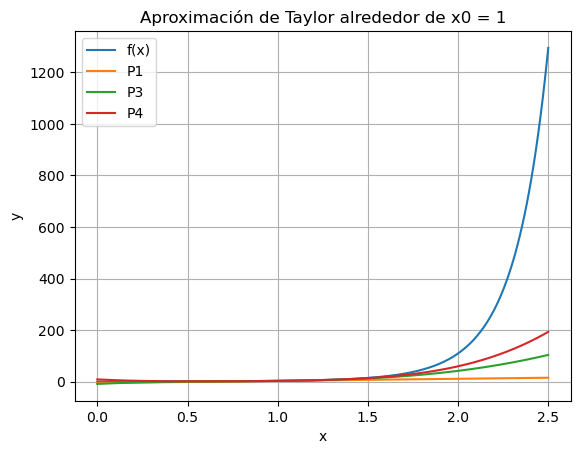

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

x = sp.symbols('x')
f = x*sp.exp(x**2)
x0 = 1

# 1) Polinomio de grado 1

P1 = Taylor_serie(f, x0, 1)
print(f'P1(x) = {P1}')

# 2) Polinomio de grado 3

P3 = Taylor_serie(f, x0, 3)
print(f'P3(x) = {P3}')

# 3️) Polinomio de grado 4

P4 = Taylor_serie(f, x0, 4)
print(f'P4(x) = {P4}')

# 4️) Aproximaciones en x = 2

# Sustituimos x = 2 en la función original f(x)
# .subs(x, 2) reemplaza la variable x por 2
# .evalf() convierte el resultado exacto (con e) en decimal
valor_real = f.subs(x, 2).evalf()
P1_2 = P1.subs(x, 2).evalf()
P3_2 = P3.subs(x, 2).evalf()
P4_2 = P4.subs(x, 2).evalf()
print("\nAproximaciones en x = 2")
print("P1(2) =", P1_2)
print("P3(2) =", P3_2)
print("P4(2) =", P4_2)

# 5️) Valor verdadero f(2)

valor_real = f.subs(x, 2).evalf()
print("\nValor verdadero")
print("f(2) =", valor_real)

# 6) Error absoluto y error relativo

def errores(real, aprox):
    error_abs = abs(real - aprox)
    error_rel = error_abs / abs(real)
    return error_abs, error_rel

print("\nErrores:")

for nombre, valor in [("P1", P1_2), ("P3", P3_2), ("P4", P4_2)]: # Calculamos e imprimimos los errores para cada polinomio
    
    # Llamamos la función errores usando:
    # valor_real → f(2)
    # valor → aproximación del polinomio
    ea, er = errores(valor_real, valor)
    
    print(f"{nombre}:")
    print("   Error absoluto =", ea)
    print("   Error relativo =", er)

# ============================================================
# 7️) Gráfica de la función vs los polinomios
# ============================================================

# lambdify convierte expresiones simbólicas de SymPy
# en funciones numéricas que Numpy puede evaluar
f_num = sp.lambdify(x, f, "numpy")
P1_num = sp.lambdify(x, P1, "numpy")
P3_num = sp.lambdify(x, P3, "numpy")
P4_num = sp.lambdify(x, P4, "numpy")

# Creamos un conjunto de valores en el intervalo [0, 2.5]
# 400 puntos para que la curva se vea suave
x_vals = np.linspace(0, 2.5, 400)

# Creamos la figura
plt.figure()

# Graficamos la función original
plt.plot(x_vals, f_num(x_vals))

# Graficamos cada polinomio
plt.plot(x_vals, P1_num(x_vals))
plt.plot(x_vals, P3_num(x_vals))
plt.plot(x_vals, P4_num(x_vals))

# Agregamos leyenda
plt.legend(["f(x)", "P1", "P3", "P4"])

# Título y etiquetas
plt.title("Aproximación de Taylor alrededor de x0 = 1")
plt.xlabel("x")
plt.ylabel("y")

# Mostramos cuadrícula
plt.grid()

# Mostramos la gráfica
plt.show()

In [16]:
import sympy as sp

x = sp.symbols('x')

def cota_truncamiento(f, n, xo, x_point):
    df = sp.diff(f, x, n+1)
    df_eval = sp.lambdify(x, df)
    x_array = np.linspace(min(xo, x_point), max(xo, x_point), 200)
    maximo = max(abs(df_eval(x_array)))
    return (maximo)

In [17]:
cota_truncamiento(g, 4, np.pi, 1)

np.float64(21955.157876515354)

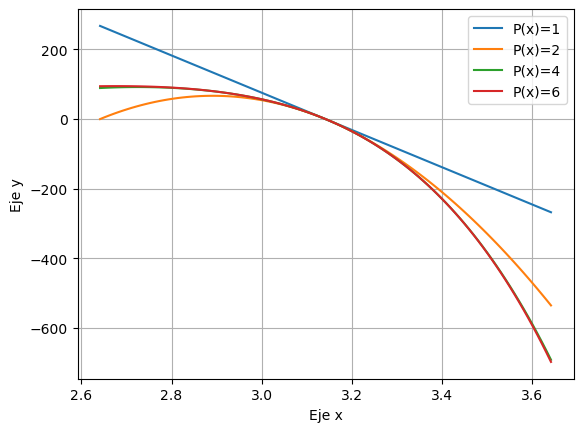

In [18]:
grados = [1,2,4,6]
xo = np.pi

def graficas_polinomio(g, xo, grados):
    delta = 0.5
    ux = np.linspace(xo-delta, xo+delta, 100)
    for i in grados:
        P_x = Taylor_serie(g, xo, i)
        Peval = sp.lambdify(x, P_x)(ux)
        plt.plot(ux, Peval, label = f'P(x)={i}')
        plt.legend()
    plt.grid()
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.savefig('imagen.jpg')
    plt.show()
    return

graficas_polinomio(g, xo, grados)

In [19]:
g = sp.exp(2*x)*sp.sin(x)
P_3 = Taylor_serie(g, np.pi, 3)

integral_analitica = sp.integrate(g, (x, 1, np.pi))
print(f'El valor de la integral analitica es {float(integral_analitica)}')
integral_aproximada = sp.integrate(P_3, (x, 1, np.pi))
print(f'El valor de la integral aproximada es {float(integral_aproximada)}')

El valor de la integral analitica es 105.40972538969403
El valor de la integral aproximada es 2884.265317350346
